# Task # 2 : To Explore Supervised Machine learning

## what will be predicted score if a student study for 9.25 hrs in a day?

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is simple linear regression task as it involves just two variables.

In [1]:
#importing necessary liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing dataset
url="http://bit.ly/w-data"
data=pd.read_csv(url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### Graphical Representation

Whether there is a relationship between two variables?

Text(0,0.5,'Percentage Scored')

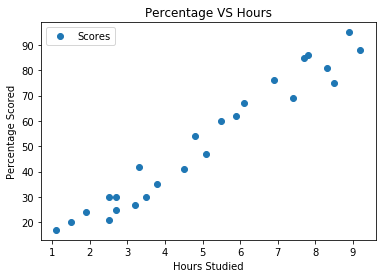

In [5]:
data.plot(x="Hours",y="Scores",title="Percentage VS Hours", style='o')
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")

There is an postive correlation between No. of hours for the study and obtained marks i.e. If student study for more no. of hours more marks he could obtain.

Separate out response variable and regressor

In [6]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values  

Train-Test Split

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) 

Training algorithm

In [8]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Regression line

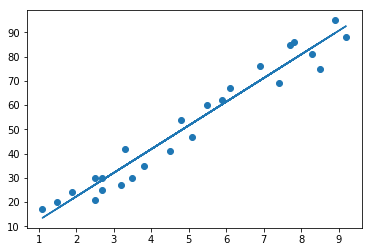

In [9]:
line = reg.intercept_+reg.coef_*X # This gives equation for the regression line
plt.scatter(X,Y)
plt.plot(X,line);
plt.show()

We have plot the regression line along with the data points.

### Prediction for test dataset

In [10]:
Y_pred=reg.predict(X_test)
print(Y_pred)

[34.96643642 49.62132336 83.81605958 33.98944395 36.92042134]


In [11]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred, 'Diff_2': (Y_test-Y_pred)**2})  
df 

,Actual,Diff_2,Predicted
0,42,49.471017,34.966436
1,54,19.172809,49.621323
2,81,7.930192,83.816060
3,27,48.852327,33.989444
4,30,47.892232,36.920421


Goodness of fit for fitted model

In [12]:
SSE=sum(df.Diff_2)
print("Sum of squares due to error:",SSE)
Y_bar=Y_test.mean()
Diffs_2=(Y_test-Y_bar)**2
SST=sum(Diffs_2)
print("Total sum of squares : ",SST)
R_square=1-(SSE/SST)
print("R_square is :",R_square)

Sum of squares due to error: 173.31857563557287
Total sum of squares :  1918.8000000000002
R_square is : 0.9096734544321592


we can say that fitted model is good using Coeff. of determination i.e. R square

Evaluating the model criteria

In [13]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 5.627633018175277


### prediction of percentage for given time of study

In [14]:
time=float(input())

9.25


In [15]:
pred=reg.predict([[time],])
print("The student may scored percentage score : ",pred[0])

The student may scored percentage score :  93.09748797554653
